# Jellemzőpont detektálás SURF detektorral OpenCV-ben

Ebben a leckében áttekintjük a SURF detektor működését és használatát OpenCV-ben. Az algoritmus leírását illetően - a korlátozott terjedelem miatt - nem térünk ki minden részletre. Az Olvasó Herbert [Bay és szerzőtársai *"Speeded Up Robust Features"* című cikkében](http://www.vision.ee.ethz.ch/~surf/eccv06.pdf) nézhet utána a részletes leírásnak. 

## A SURF detektor működése

1. Határozzuk meg minden $p$ pontban $\sigma$ skálaérték mellett a $H(p,\sigma)$ Hesse-féle mátrix értékét 
$$
H(p,\sigma) = \begin{pmatrix} L_{xx}(p,\sigma) & L_{xy}(p,\sigma) \\ L_{yx}(p,\sigma) & L_{yy}(p,\sigma) \end{pmatrix},
$$
ahol $L_{xx}$ az $I(x,y)$ kép a Gauss-függvény másodrendű deriváltjával konvolvált eredménye az $x$ pontban (a többi érték hasonlóan számolandó).
2. A többi jellemződetektortól eltérően itt a simítás nem képpiramis előállításával, hanem a szűrőméret növelésével történik, amely felgyorsítja az eljárást. 
3. Az érdekes pontok lokalizációja a skálatérben $3\times3\times3$-as környezettel történik (nem-maximális pontok elnyomása). 
4. Az orientáció meghatározásához Haar-waveleteket használnak az "érdekes pontok" egy lokális környezetében. 
5. Az "érdekes pontok" $20s$ méretű környezetét (ahol $s$ a skála-érték, ahol a pontot detektáltuk) $4\times4$ részre osztjuk és mindegyik $5\times5$-ös méretű részre kiszámoljuk a Haar-wavelet válaszfüggvény értékét, amelyet a Gauss-függvény szerint súlyozunk. 

## A SURF detektor használata az OpenCV-ben

A SURF detektor az *xfeatures2d* csomagba került, mivel kereskedelmi és ipari felhasználása szabadalmi költséget von magaután. Oktatási és kutatási célra ingyen használható. 

A SURF detektor beállítandó paraméterei a következők:
* **hessianThreshold**: a Hesse-féle mátrix értékek küszübértéke 
* **nOctave**: a piramis-oktávok száma
* **nOctaveLayers**: az oktáv-rétegek száma
* **extended**: egy kapcsoló (igaz/hamis), hogy 128- vagy 64-hosszú leíróvektor készüljön
* **upright**: egy kapcsoló (igaz/hamis), hogy számoljon-e orientációt vagy sem



# Példaprogram

Az alábbi példa bemutatja a SURF detektor használatát:
1. Kép megnyitása.
2. A színes kép szürkeárnyalatossá konvertálása
3. A jellemzőpont detektor létrehozása. 
4. Jellemzőpontok (kulcspontok) detektálása a szürkeárnyalatos képen.
5. Jellemzőpontok leírása.
6. Jellemzőpontok kirajzolása. 

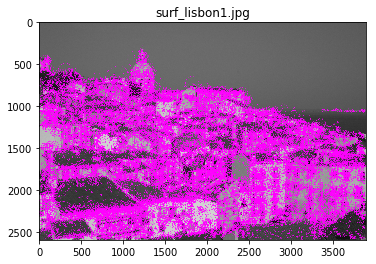

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


SOURCE_IMAGE='lisbon1.jpg'
OUTPUT_IMAGE='surf_lisbon1.jpg'

## kép beolvasása
img = cv2.imread(SOURCE_IMAGE);

## a képet szürkeárnyalatossá konvertáljuk
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## jellemzőpontok detektálása 
surf = cv2.xfeatures2d.SURF_create()
keypoints = surf.detect(gray_img, None)

## kulcspont leírók számítása
keypoints, descriptors = surf.compute(gray_img, keypoints)

## kulcspontok kirajzolása
out_img = cv2.drawKeypoints(gray_img, keypoints, descriptors, color=(255, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite(OUTPUT_IMAGE, out_img)

plt.imshow(out_img);
plt.title(OUTPUT_IMAGE)
plt.show()